<a href="https://colab.research.google.com/github/ayushpatel2809/-FUTURE_ML_02/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0182
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 3.5517e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 2.8101e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 2.6911e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.1006e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 2.8760e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.4366e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 2.6688e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 2.5691e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.3128e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


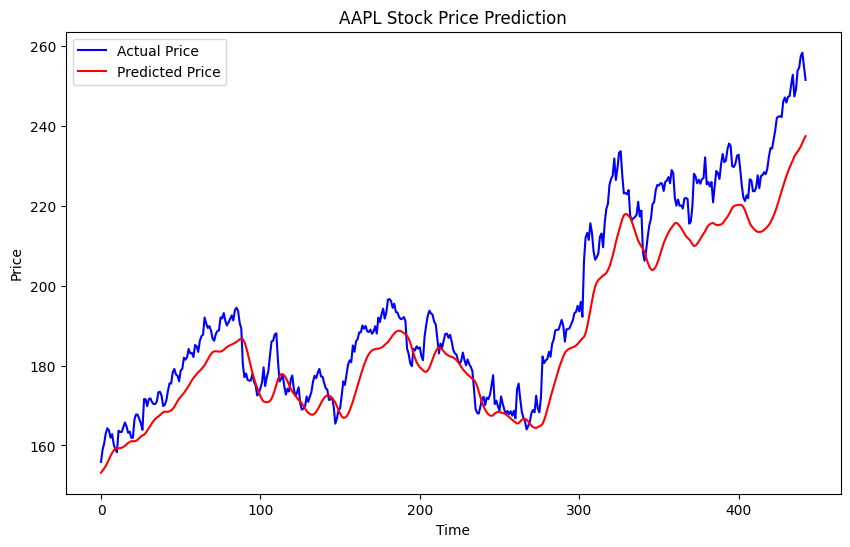

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

stock_symbol = 'AAPL'  # Change this to your stock symbol (e.g. TCS.NS, RELIANCE.NS)
df = yf.download(stock_symbol, start='2015-01-01', end='2024-12-31')

data = df['Close'].values.reshape(-1, 1)  # Using 'Close' price
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(actual_prices, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()